# MNIST Dataset `1 2 3 ... 9`
dataset: https://www.tensorflow.org/datasets/catalog/mnist

This notebook is for creating a conventional neural network for detecting hand written numbers using tensorflow

In [1]:
# Imports
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
# Getting the data
(X_train , y_train) , (X_test , y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Getting familiar with the data

In [3]:
print(f"Length of the training sample is {len(X_train)} \n")
print(f"Length of the test sample is {len(X_test)} \n")

Length of the training sample is 60000 

Length of the test sample is 10000 



In [4]:
print(f"Training label: \n {y_train[0]}")
print(f"Training sample: \n {X_train[0]}\n")

Training label: 
 5
Training sample: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0

In [5]:
# Checking the shape of a single example
X_train[0].shape , y_train[0].shape

((28, 28), ())

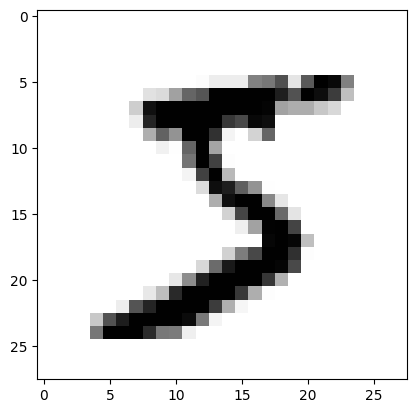

In [6]:
# Plot a single sample
plt.imshow(X_train[0] , cmap = plt.cm.binary)

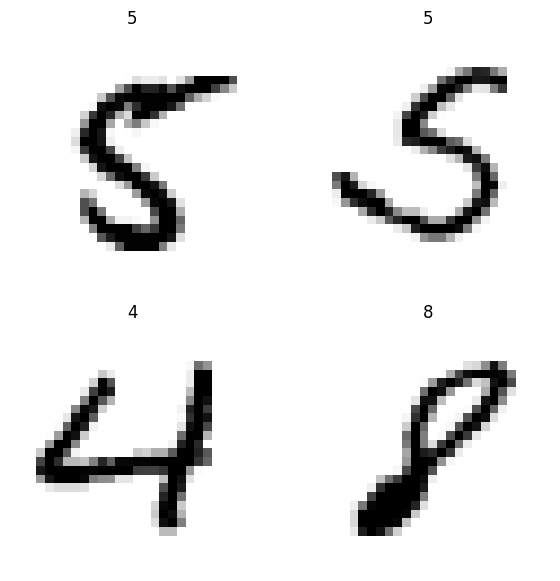

In [7]:
# Plot random images of mnist dataset
import random
plt.figure(figsize = (7,7))
for i in range(4):
  ax = plt.subplot(2 , 2 , i+1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index] , cmap = plt.cm.binary)
  plt.title(y_train[rand_index])
  plt.axis(False)

## Building a Multiclass classification model
Things to remeber
* input_shape = 28 * 28
* Output_shape = 10
* Loss Function = Sparse Categorical Crossentopy
* Output should be sigmoid

In [8]:
# Creating model 1
tf.random.set_seed(10)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28 , 28)),
    tf.keras.layers.Dense(4 , activation = "relu"),
    tf.keras.layers.Dense(4 , activation = "relu"),
    tf.keras.layers.Dense(10 , activation = "softmax")
    ])
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
history_1 = model_1.fit(X_train,
                        y_train,
                        epochs = 10,
                        validation_data = (X_test , y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 2.0638 - accuracy: 0.2635 - val_loss: 1.7436 - val_accuracy: 0.3101
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6651 - accuracy: 0.3410 - val_loss: 1.6195 - val_accuracy: 0.3653
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5942 - accuracy: 0.3765 - val_loss: 1.5329 - val_accuracy: 0.4104
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4975 - accuracy: 0.4253 - val_loss: 1.4585 - val_accuracy: 0.4523
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4268 - accuracy: 0.4567 - val_loss: 1.3936 - val_accuracy: 0.4748
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3231 - accuracy: 0.5123 - val_loss: 1.2136 - val_accuracy: 0.5643
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1782 - accuracy: 0.6000 - val_loss: 1.1201 - val_accuracy

In [9]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


<Axes: title={'center': 'non_normalized data'}>

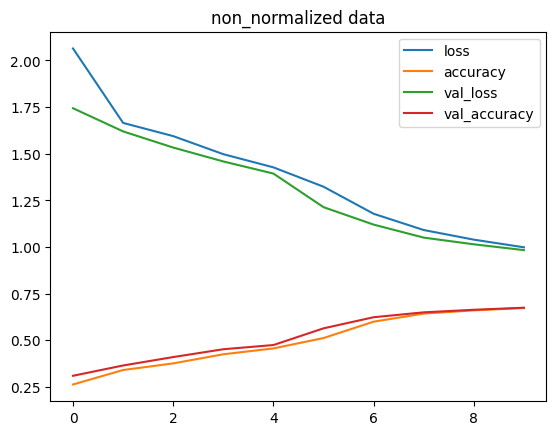

In [10]:
# Plot model_1 data loss curves
pd.DataFrame(history_1.history).plot(title = "non_normalized data")

It seems that the model was improving at the last couple of epochs so let's try fitting for more

In [11]:
history_1 = model_1.fit(X_train,
                        y_train,
                        epochs = 50,
                        validation_data = (X_test , y_test))

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9746 - accuracy: 0.6766 - val_loss: 1.0080 - val_accuracy: 0.6734
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9573 - accuracy: 0.6815 - val_loss: 0.9793 - val_accuracy: 0.6733
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9482 - accuracy: 0.6833 - val_loss: 0.9461 - val_accuracy: 0.6824
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9368 - accuracy: 0.6881 - val_loss: 0.9383 - val_accuracy: 0.6772
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9202 - accuracy: 0.6972 - val_loss: 0.9425 - val_accuracy: 0.6906
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9022 - accuracy: 0.7090 - val_loss: 0.9010 - val_accuracy: 0.7009
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8480 - accuracy: 0.7315 - val_loss: 0.7962 - val_accuracy:

<Axes: title={'center': 'non_normalized data'}>

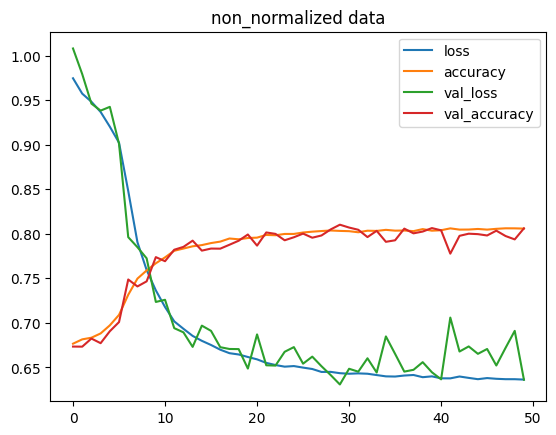

In [12]:
# Plot model_1 data loss curves
pd.DataFrame(history_1.history).plot(title = "non_normalized data")

It seems like there is a decrease but the model is not working as good as we need , so let's try normalization

In [13]:
print(f"Max: {X_train.max()}")
print(f"Min: {X_train.min()}")

Max: 255
Min: 0


Which is logical as the images are grey scale so the range of pixels is between 0 to 255

In [14]:
# Normalization
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0
print(f"Max: {X_train_norm.max()}")
print(f"Min: {X_train_norm.min()}")

Max: 1.0
Min: 0.0


Building a model on normalized data

In [15]:
# Creating model 2
tf.random.set_seed(10)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28 , 28)),
    tf.keras.layers.Dense(4 , activation = "relu"),
    tf.keras.layers.Dense(4 , activation = "relu"),
    tf.keras.layers.Dense(10 , activation = "softmax")
    ])
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
history_2 = model_2.fit(X_train_norm,
                        y_train,
                        epochs = 10,
                        )

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4817 - accuracy: 0.4490
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9992 - accuracy: 0.6321
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9200 - accuracy: 0.6615
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8831 - accuracy: 0.6806
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8614 - accuracy: 0.6884
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8449 - accuracy: 0.6946
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8348 - accuracy: 0.7014
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8245 - accuracy: 0.7153
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7950 - accuracy: 0.7562
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.768

<Axes: title={'center': 'normalized_data'}>

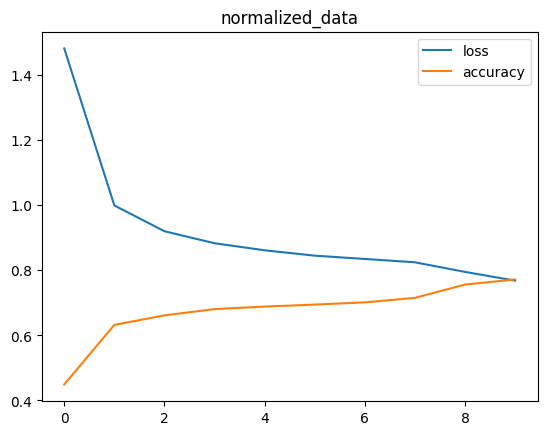

In [16]:
pd.DataFrame(history_2.history).plot(title = "normalized_data")

## Let's Find the ideal learning rate

In [17]:
# Set random seed
tf.random.set_seed(10)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28 , 28)), # to flatten the data in one long vector
    tf.keras.layers.Dense(4 , activation = "relu"),
    tf.keras.layers.Dense(4 , activation = "relu"),
    tf.keras.layers.Dense(10 , activation = "softmax"),
])

model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 10e-4 * (10 ** (epoch / 20)))
find_lr_history = model_3.fit(X_train_norm,
                               y_train,
                               epochs = 40,
                               callbacks = [lr_scheduler],
                               validation_data = (X_test_norm , y_test))

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2823 - accuracy: 0.5656 - val_loss: 0.9400 - val_accuracy: 0.6806 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8382 - accuracy: 0.7272 - val_loss: 0.7036 - val_accuracy: 0.7987 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6598 - accuracy: 0.8062 - val_loss: 0.6065 - val_accuracy: 0.8274 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6023 - accuracy: 0.8241 - val_loss: 0.5643 - val_accuracy: 0.8400 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5773 - accuracy: 0.8328 - val_loss: 0.5583 - val_accuracy: 0.8402 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5637 - accuracy: 0.8383 - val_loss: 0.5480 - val_accuracy: 0.8449 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Finding the ideal learning rate')

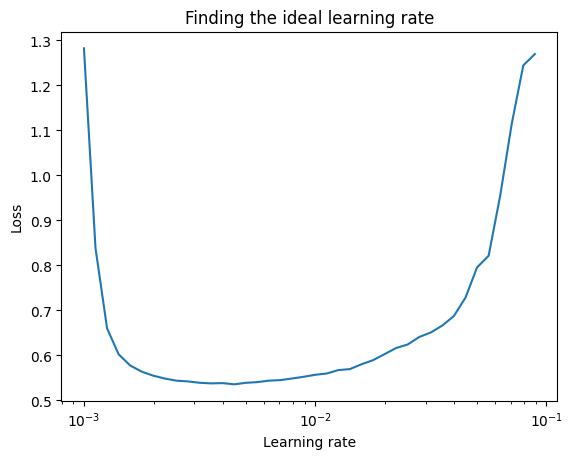

In [18]:
lrs = 10e-4 * (10 ** (tf.range(40) / 20))
plt.semilogx(lrs , find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

It seems to be around 0.001

## Let's try to train our model with the ideal learning rate for 100 epochs

In [19]:
# Set random seed
tf.random.set_seed(10)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28 , 28)), # to flatten the data in one long vector
    tf.keras.layers.Dense(4 , activation = "relu"),
    tf.keras.layers.Dense(4 , activation = "relu"),
    tf.keras.layers.Dense(10 , activation = "softmax"),
])

model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
                metrics = ["accuracy"])

history_4 = model_4.fit(X_train_norm,
                        y_train,
                        epochs = 100,
                        validation_data = (X_test_norm , y_test))

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3663 - accuracy: 0.5277 - val_loss: 0.9282 - val_accuracy: 0.7063
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7571 - accuracy: 0.7852 - val_loss: 0.6124 - val_accuracy: 0.8329
Epoch 3/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5914 - accuracy: 0.8315 - val_loss: 0.5491 - val_accuracy: 0.8414
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5413 - accuracy: 0.8420 - val_loss: 0.5164 - val_accuracy: 0.8533
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5139 - accuracy: 0.8501 - val_loss: 0.4934 - val_accuracy: 0.8582
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4955 - accuracy: 0.8560 - val_loss: 0.4844 - val_accuracy: 0.8590
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4814 - accuracy: 0.8593 - val_loss: 0.4766 - val_ac

In [20]:
## Visualizing random model predictions (from the fashionmnist notebook)
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = pred_probs.argmax()
  true_label = true_labels[i]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
    # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
                                                    color=color) # set the color to green or red


1/1 [==============================] - 0s 100ms/step


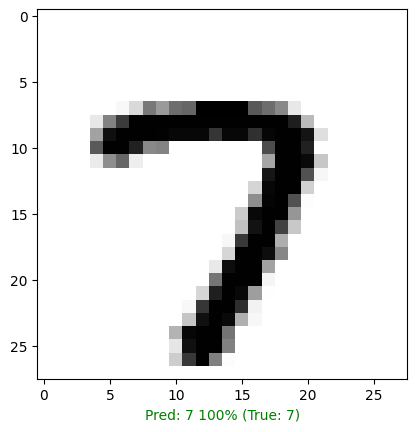

In [21]:
# Check out a random image as well as its prediction
plot_random_image(model=model_4,
                  images=X_test_norm,
                  true_labels=y_test,
                  )

1/1 [==============================] - 0s 36ms/step


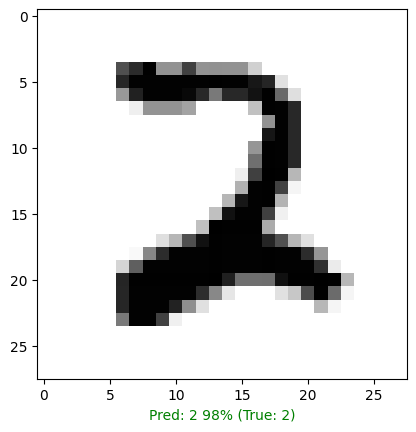

In [22]:
plot_random_image(model=model_4,
                  images=X_test_norm,
                  true_labels=y_test,
                  )

In [23]:
model_4.evaluate(X_test_norm , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4330 - accuracy: 0.8794


[0.43297168612480164, 0.8794000148773193]

It seems our model is doing well in classifying numbers.

## Grand Finale
Let's try making a bigger model with the ideal learning rate for 20 epochs

In [24]:
# Set random seed
tf.random.set_seed(10)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28 , 28)), # to flatten the data in one long vector
    tf.keras.layers.Dense(32 , activation = "relu"),
    tf.keras.layers.Dense(16 , activation = "relu"),
    tf.keras.layers.Dense(8 , activation = "relu"),
    tf.keras.layers.Dense(10 , activation = "softmax"),
])

model_5.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
                metrics = ["accuracy"])

history_5 = model_5.fit(X_train_norm,
                        y_train,
                        epochs = 20,
                        validation_data = (X_test_norm , y_test))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4865 - accuracy: 0.8499 - val_loss: 0.2232 - val_accuracy: 0.9350
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1966 - accuracy: 0.9439 - val_loss: 0.1712 - val_accuracy: 0.9491
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1568 - accuracy: 0.9539 - val_loss: 0.1499 - val_accuracy: 0.9551
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1317 - accuracy: 0.9615 - val_loss: 0.1468 - val_accuracy: 0.9564
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1166 - accuracy: 0.9650 - val_loss: 0.1495 - val_accuracy: 0.9565
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1058 - accuracy: 0.9681 - val_loss: 0.1505 - val_accuracy: 0.9577
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0977 - accuracy: 0.9703 - val_loss: 0.1358 - val_accuracy:

So using a bigger neural network with the ideal learning rate and normalized data have significantly improved our training accuracy and validation accuracy

<Axes: title={'center': 'normalized_data'}>

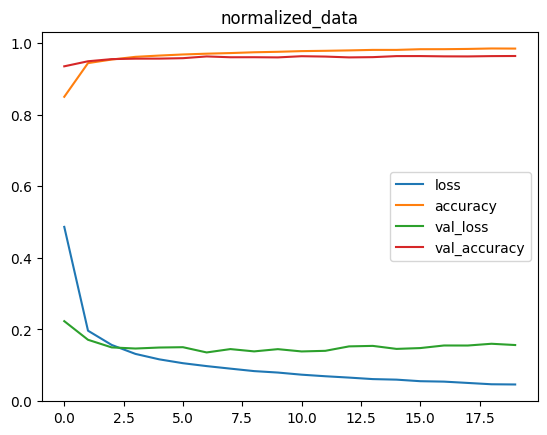

In [26]:
pd.DataFrame(history_5.history).plot(title = "normalized_data")

In [28]:
model_5.evaluate(X_test_norm , y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1565 - accuracy: 0.9638


[0.156533882021904, 0.9638000130653381]

It seems that around epoch 2 the model has no increase in performance and the performance is flattened. However we reached ~0.98 training accuracy and ~0.96 validation accuracy. Next experiment can be to try and use convolutional neural network. However, this is an overkill as the data is somehow simple! Conv networks will be used in later projects.